In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_player = pd.read_csv('../season_data/all_seasons.csv')

In [3]:
df_player.head()

,player,shirtnumber,nationality,position,age,minutes,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,...,pens_made,pens_att,shots,shots_on_target,xg,npxg,sca,gca,equipo_gw,goals_against
0,Miguel Ángel Guerrero,9,es ESP,FW,27-037,90,1.0,1,0.0,0.0,...,0,0,4,1,0.3,0.3,2.0,1.0,Leganés _1,1.0
1,Alexander,11,ar ARG,LW,28-309,90,1.0,1,0.0,1.0,...,0,0,2,0,0.1,0.1,5.0,0.0,Leganés _1,1.0
2,Omar Ramos,23,es ESP,RW,29-204,64,2.0,2,1.0,0.0,...,0,0,1,0,0.0,0.0,5.0,0.0,Leganés _1,1.0
3,Erik Morán,4,es ESP,DM,26-085,26,0.0,0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,Leganés _1,1.0
4,Javier Eraso,17,es ESP,"AM,RW",27-149,69,2.0,1,1.0,1.0,...,0,0,0,0,0.0,0.0,1.0,0.0,Leganés _1,1.0


In [4]:
df_player.shape

(71744, 107)

In [5]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71744 entries, 0 to 71743
Columns: 107 entries, player to goals_against
dtypes: float64(80), int64(19), object(8)
memory usage: 58.6+ MB


In [6]:
df_player.columns

Index(['player', 'shirtnumber', 'nationality', 'position', 'age', 'minutes',
       'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd',
       ...
       'pens_made', 'pens_att', 'shots', 'shots_on_target', 'xg', 'npxg',
       'sca', 'gca', 'equipo_gw', 'goals_against'],
      dtype='object', length=107)

In [7]:
df_player['age'] = pd.to_numeric(df_player['age'].str.split('-').str[0])

In [8]:
player_positions = df_player['position'].value_counts().head(20)
player_positions

position
CB       11287
FW       10208
CM        8332
RB        4969
GK        4891
LB        4866
RM        3955
LM        3863
DM        2884
LW        2502
RW        2497
AM        1836
WB         676
DM,CM      476
CM,DM      425
RM,LM      288
LM,RM      254
RM,CM      248
CM,LM      240
CM,RM      240
Name: count, dtype: int64

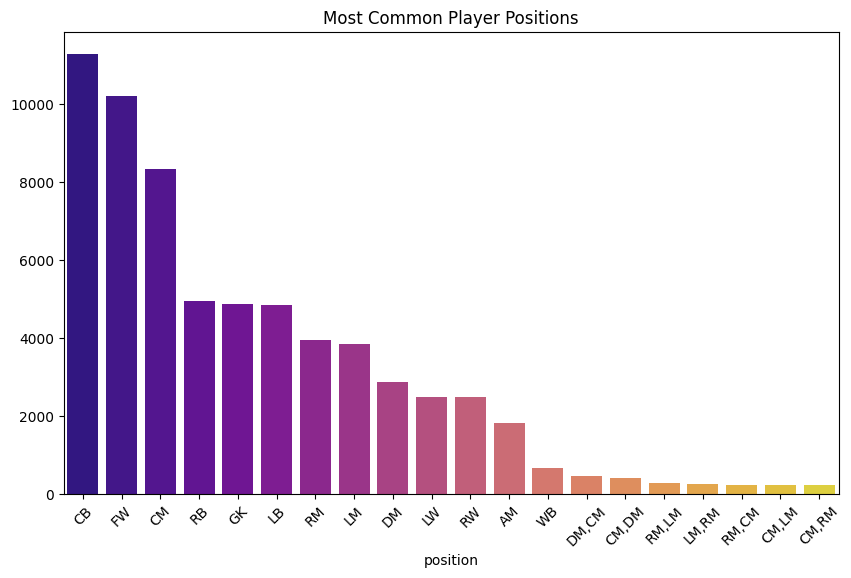

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=player_positions.index,hue=player_positions.index, y=player_positions.values,palette="plasma",capsize=.2)

plt.title('Most Common Player Positions')
plt.xticks(rotation=45)
plt.show()

In [10]:
country_players = df_player['nationality'].value_counts().head(10)
country_players

nationality
es ESP    41583
ar ARG     4042
br BRA     3002
fr FRA     2733
uy URU     2326
pt POR     1752
rs SRB     1176
ma MAR      962
co COL      942
gh GHA      805
Name: count, dtype: int64

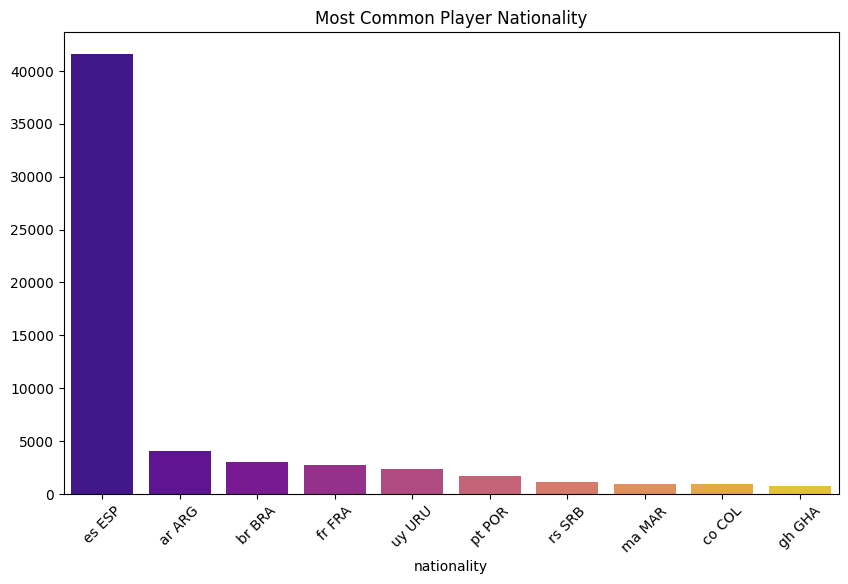

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_players.index,hue=country_players.index, y=country_players.values,palette="plasma",capsize=.2)

plt.title('Most Common Player Nationality')
plt.xticks(rotation=45)
plt.show()

In [14]:
age_players = df_player['age'].value_counts()
age_players

age
26    6147
29    6143
28    6133
27    5929
25    5611
30    5456
24    5072
23    4932
31    4729
22    4383
32    3308
21    3068
33    2598
20    2126
34    1868
19    1160
35    1015
36     608
18     476
37     373
38     215
17     150
40     102
39      93
41      25
16      22
15       2
Name: count, dtype: int64

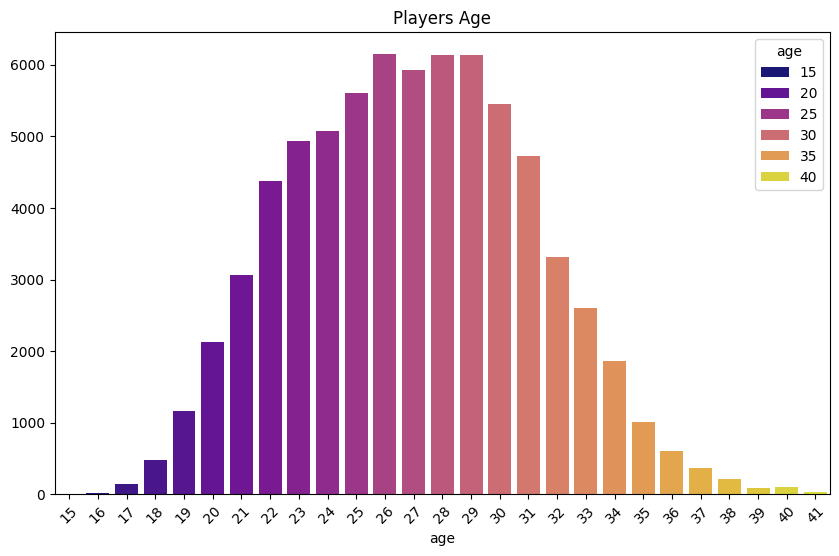

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_players.index, hue=age_players.index, y=age_players.values, palette="plasma", capsize=.2)

plt.title('Players Age')
plt.xticks(rotation=45)
plt.show()


Which team have the most number of old players > 35 and which < 23

In [28]:
age_players_old = df_player[(df_player['age'] >= 34) & (df_player['age'] <= 41)]['age'].value_counts()
age_players_old

age
34    1868
35    1015
36     608
37     373
38     215
40     102
39      93
41      25
Name: count, dtype: int64

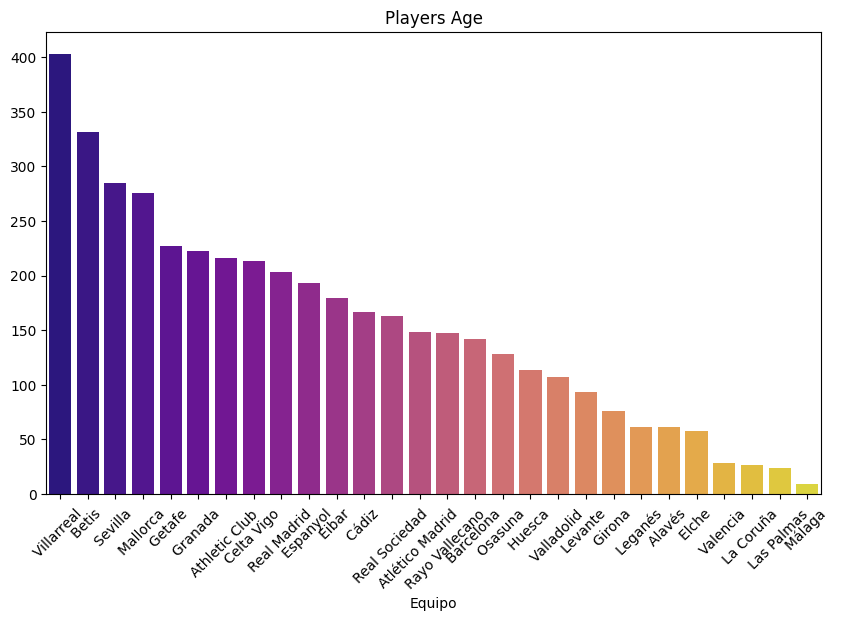

In [37]:
team_old = df_player[(df_player['age'] >= 34) & (df_player['age'] <= 41)]['Equipo'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=team_old.index, hue=team_old.index, y=team_old.values, palette="plasma", capsize=.2)

plt.title('Players Age')
plt.xticks(rotation=45)
plt.show()


In [29]:
age_players_young = df_player[(df_player['age'] >= 15) & (df_player['age'] <= 23)]['age'].value_counts()
age_players_young

age
23    4932
22    4383
21    3068
20    2126
19    1160
18     476
17     150
16      22
15       2
Name: count, dtype: int64

NameError: name 'x' is not defined

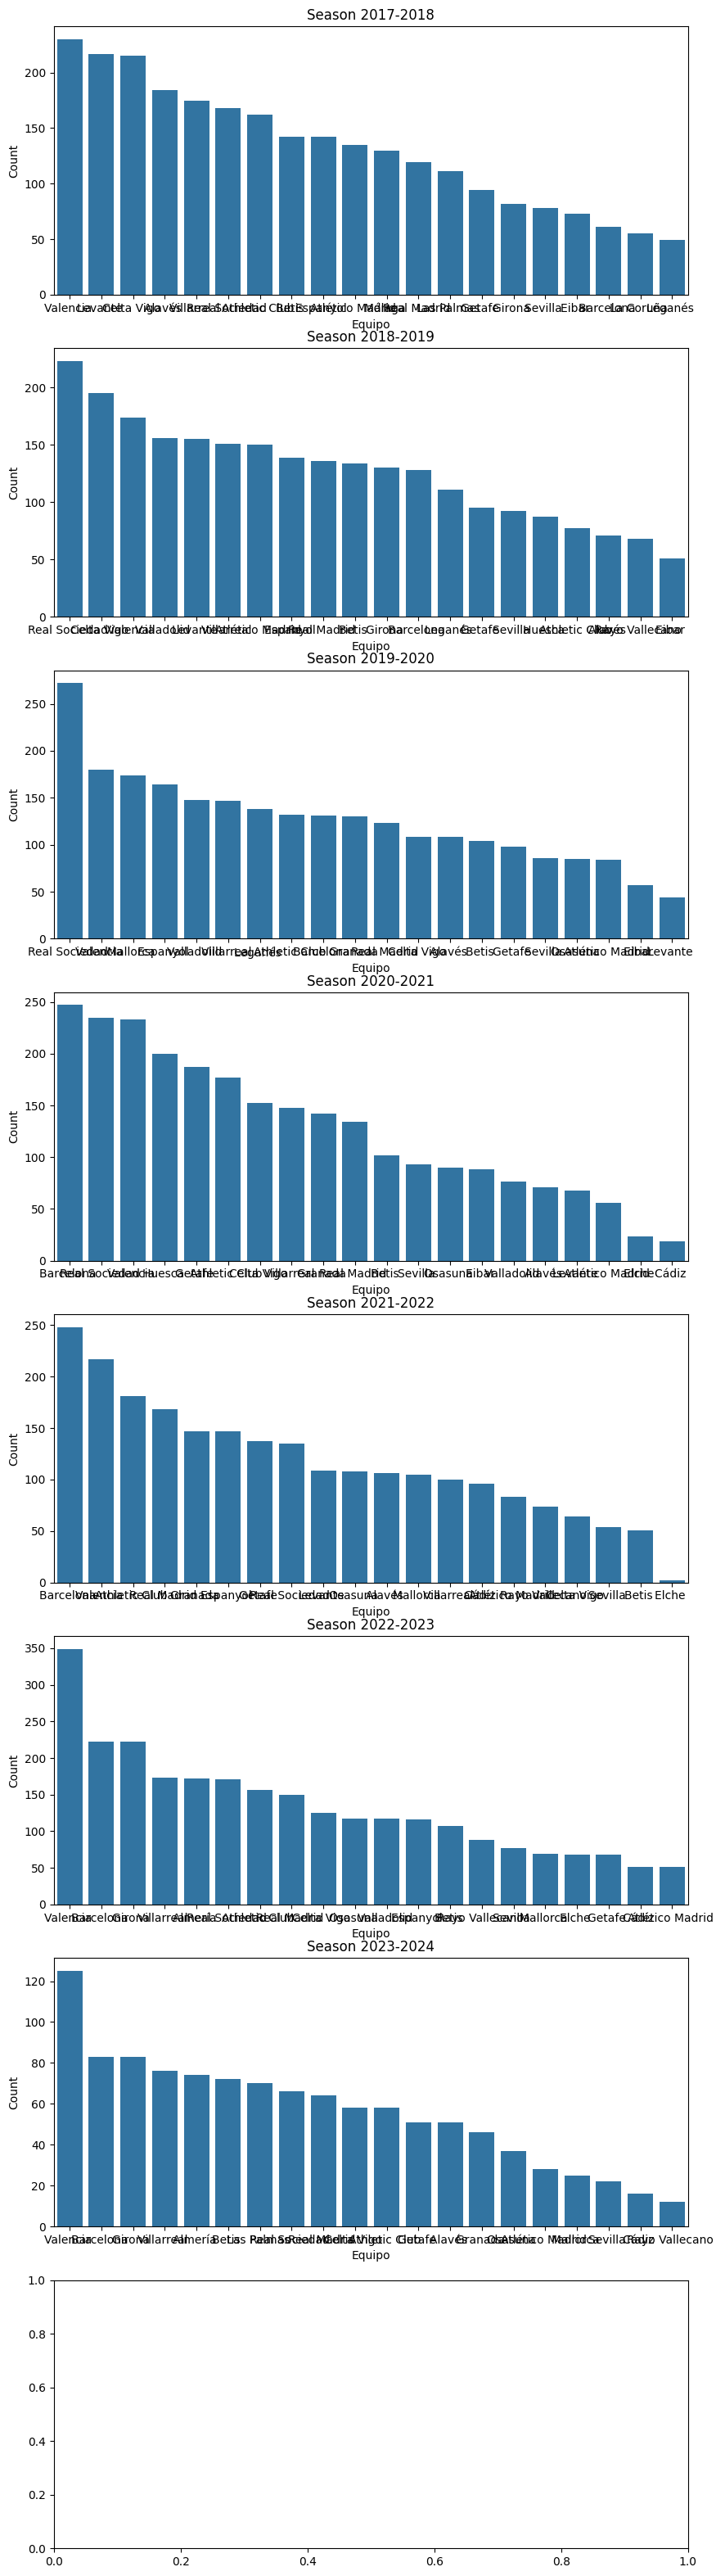

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

df_young = df_player[(df_player['age'] >= 15) & (df_player['age'] <= 23)]
grouped = df_young.groupby('Season')['Equipo'].value_counts().reset_index(name='Count')


unique_seasons = grouped['Season'].unique()


fig, axes = plt.subplots(nrows=len(unique_seasons) + 1, figsize=(10, 5 * (len(unique_seasons) + 1)))


for i, season in enumerate(unique_seasons):
    data = grouped[grouped['Season'] == season]
    ax = axes[i]
    sns.barplot(x='Equipo', y='Count', data=data, ax=ax)
    ax.set_title(f'Season {season}')
    ax.set_xlabel('Equipo')
    ax.set_ylabel('Count')


average_data = grouped.groupby('Equipo')['Count'].mean().reset_index(name='Average Count')
ax = axes[-1]
sns.barplot(x='Equipo', y='Average Count', data=average_data, ax=ax,hue=x,palette="plasma")
ax.set_title('Average Across Seasons')
ax.set_xlabel('Equipo')
ax.set_ylabel('Average Count')


plt.tight_layout()
plt.show()
